In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [32]:
df = pd.read_csv("stock_data/NSEI_processed.csv")

In [33]:

print(df.shape)
print(df.columns.tolist)
print(df.describe())
df['Target'].value_counts(normalize=True)


(1674, 19)
<bound method IndexOpsMixin.tolist of Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Adj Close', 'SMA_10',
       'SMA_50', 'EMA_10', 'RSI_14', 'MACD', 'BB_High', 'BB_Low',
       'Daily_Return', 'Lag_1', 'Lag_2', 'Lag_3', 'Target'],
      dtype='object')>
              Close          High           Low          Open        Volume  \
count   1674.000000   1674.000000   1674.000000   1674.000000  1.674000e+03   
mean   16551.336621  16641.086554  16455.800826  16561.649911  3.927553e+05   
std     4710.324314   4721.252772   4697.415333   4708.099861  2.012890e+05   
min     7610.250000   8036.950195   7511.100098   7735.149902  0.000000e+00   
25%    11772.524902  11847.937744  11699.399658  11778.999756  2.587500e+05   
50%    16996.075195  17130.274414  16900.649414  17048.200195  3.282500e+05   
75%    19644.113281  19695.225098  19550.800781  19622.100098  4.979000e+05   
max    26216.050781  26277.349609  26151.400391  26248.250000  1.811000e+06   

         

Target
1    0.542413
0    0.457587
Name: proportion, dtype: float64

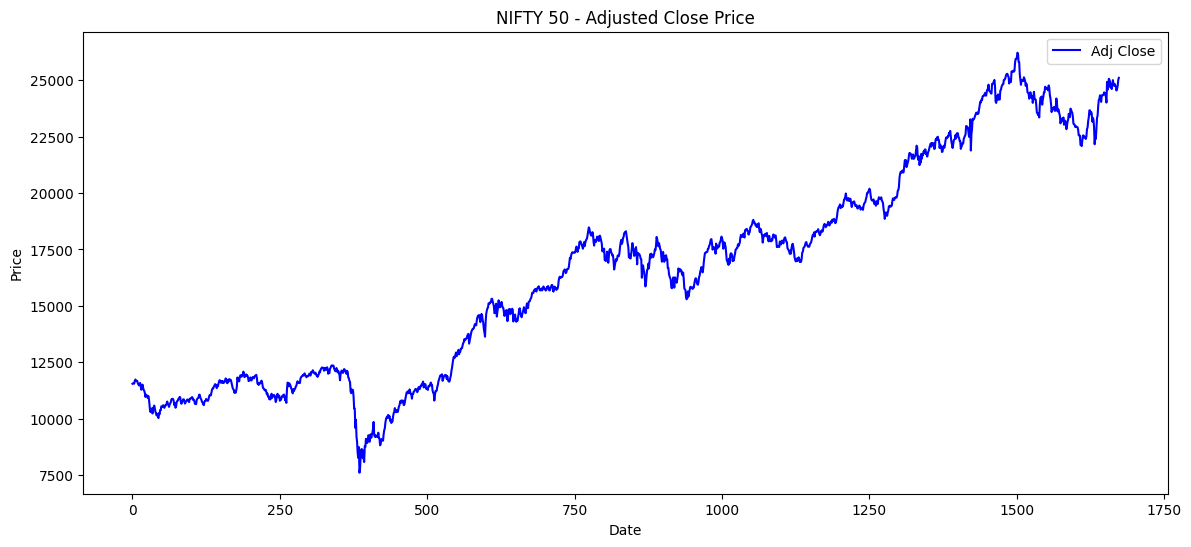

In [34]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.title('NIFTY 50 - Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


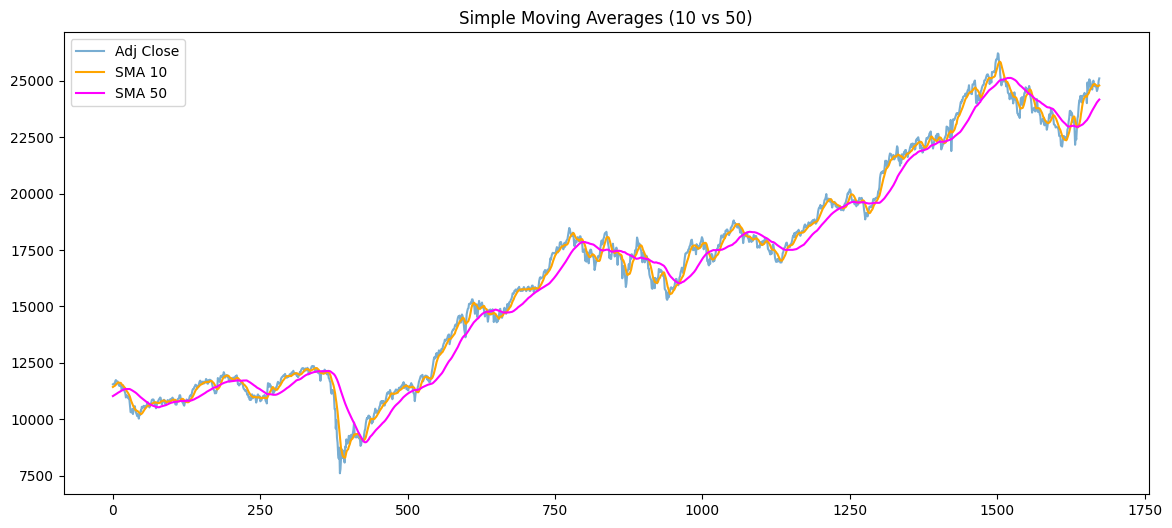

In [35]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', alpha=0.6)
plt.plot(df.index, df['SMA_10'], label='SMA 10', color='orange')
plt.plot(df.index, df['SMA_50'], label='SMA 50', color='magenta')
plt.legend()
plt.title('Simple Moving Averages (10 vs 50)')
plt.show()


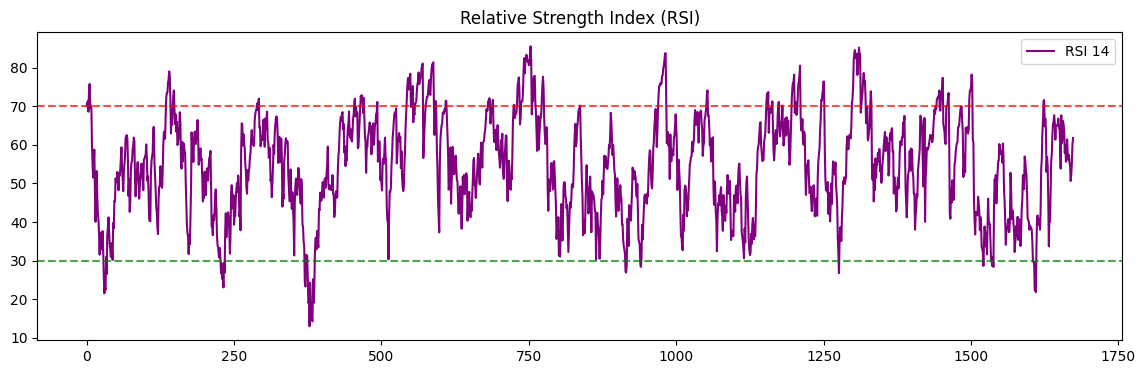

In [36]:
plt.figure(figsize=(14,4))
plt.plot(df.index, df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, linestyle='--', color='red', alpha=0.7)  # Overbought
plt.axhline(30, linestyle='--', color='green', alpha=0.7) # Oversold
plt.legend()
plt.title('Relative Strength Index (RSI)')
plt.show()


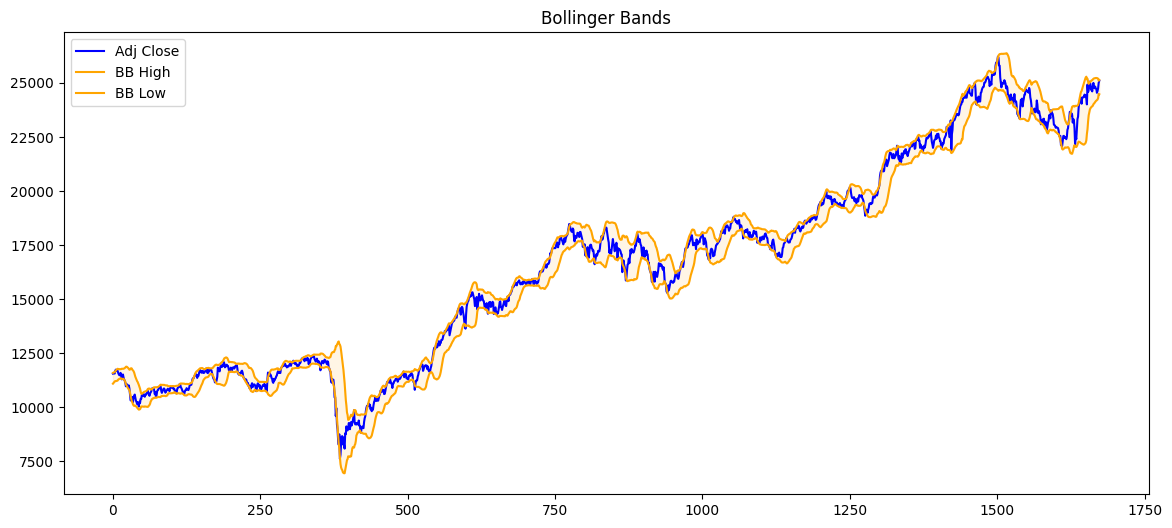

In [37]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
plt.plot(df.index, df['BB_High'], label='BB High', color='orange')
plt.plot(df.index, df['BB_Low'], label='BB Low', color='orange')
plt.fill_between(df.index, df['BB_Low'], df['BB_High'], color='orange', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend()
plt.show()


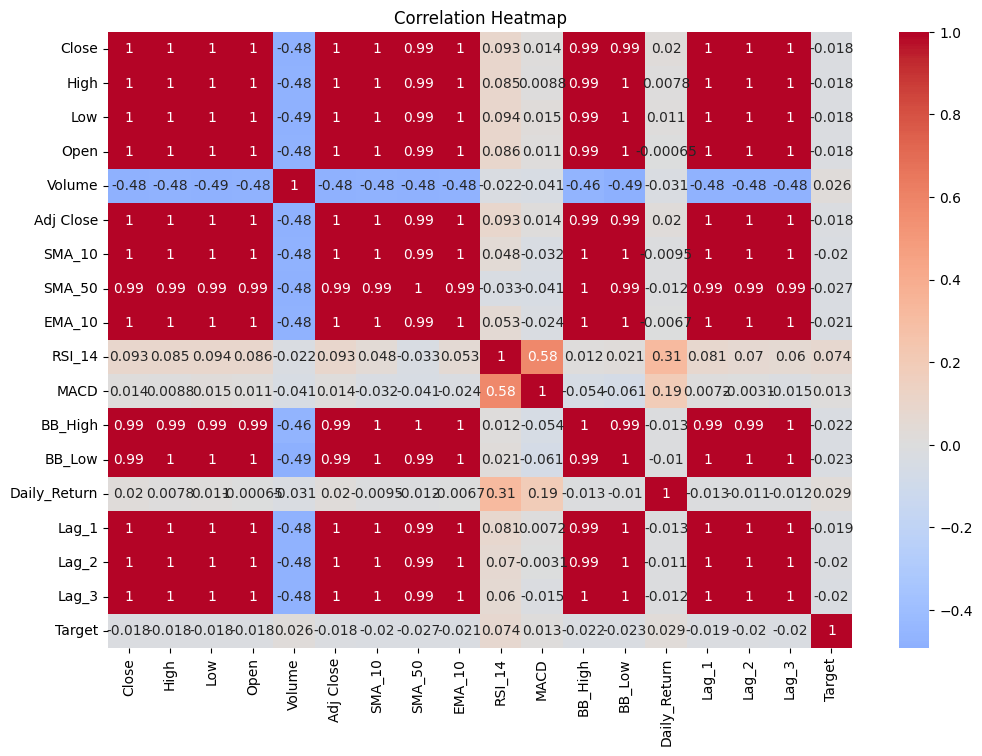

In [38]:

plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


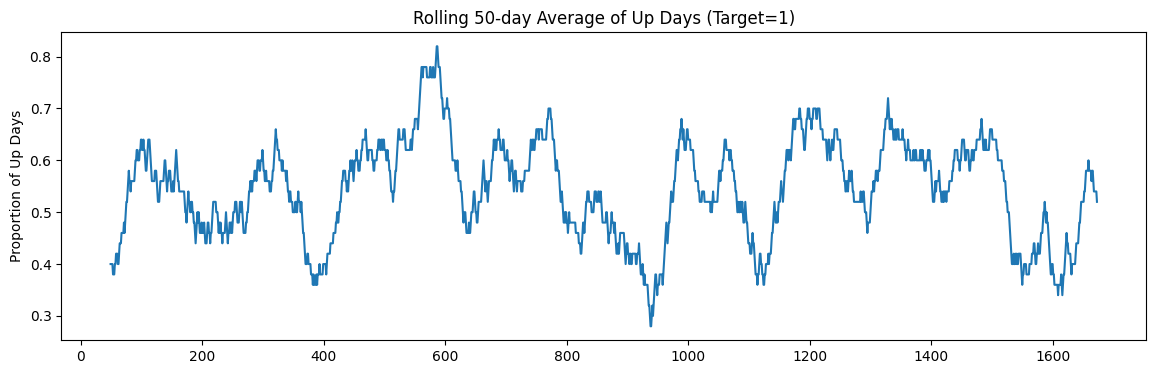

In [39]:
df['Target'].rolling(50).mean().plot(figsize=(14,4))
plt.title('Rolling 50-day Average of Up Days (Target=1)')
plt.ylabel('Proportion of Up Days')
plt.show()
